In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 14.5 MB/s eta 0:00:00



image 1/1 /content/Budweiser and Tiësto ignite global partnership with Tomorrowland - Hospitality & Catering News.jpeg: 448x640 2 beerLabels, 160.7ms
Speed: 7.1ms preprocess, 160.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


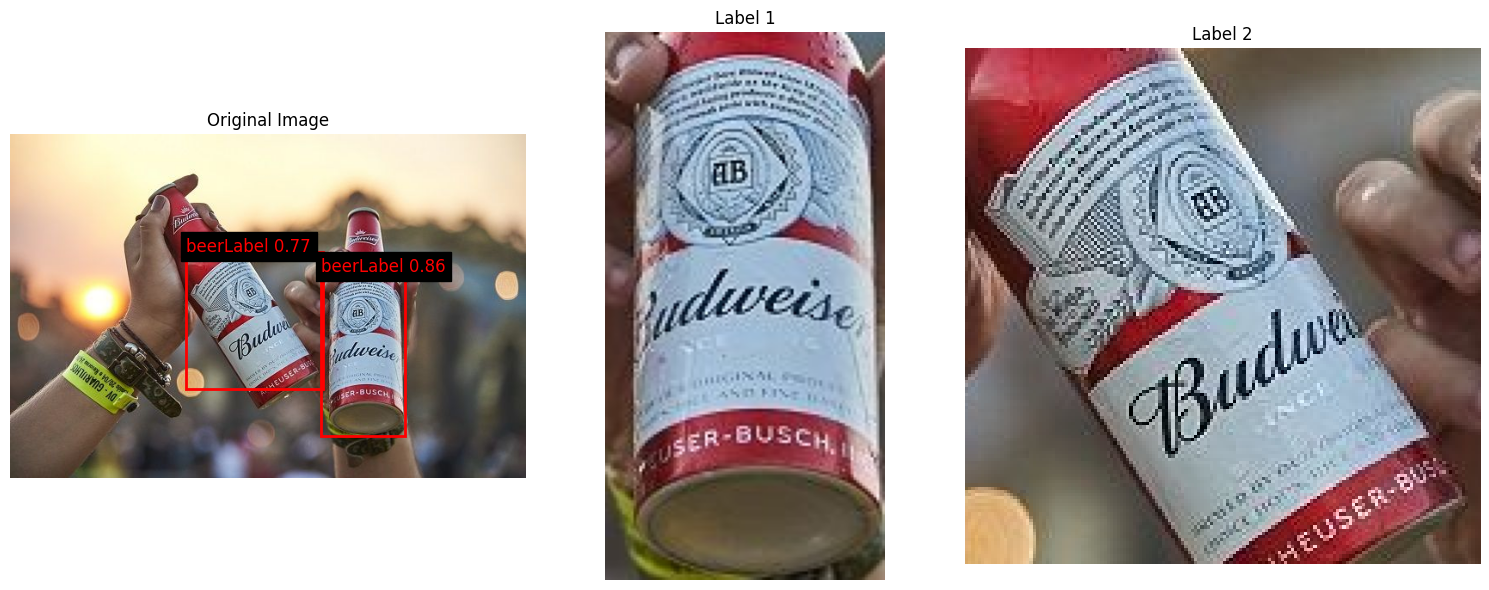

'results_Budweiser and Tiësto ignite global partnership with Tomorrowland - Hospitality & Catering News.jpeg'

In [7]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

model = YOLO("/content/drive/MyDrive/IBeer.ai/labelDetector/model/custom_model/weights/best.pt")

image_path = "/content/Budweiser and Tiësto ignite global partnership with Tomorrowland - Hospitality & Catering News.jpeg"
results = model.predict(image_path)

result = results[0]

boxes = result.boxes
classes = result.names

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, len(boxes) + 1, figsize=(15, 6))
axes[0].imshow(img_rgb)
axes[0].axis('off')
axes[0].set_title("Original Image")

for idx, box in enumerate(boxes):
    x1, y1, x2, y2 = box.xyxy[0]
    confidence = box.conf[0]
    class_id = int(box.cls[0])

    axes[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2))
    axes[0].text(x1, y1, f"{classes[class_id]} {confidence:.2f}", color='red', fontsize=12, backgroundcolor='black')

    cropped_img = img[int(y1):int(y2), int(x1):int(x2)]
    cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

    axes[idx + 1].imshow(cropped_img_rgb)
    axes[idx + 1].axis('off')
    axes[idx + 1].set_title(f"Label {idx + 1}")

plt.tight_layout()
plt.show()

result.save()